# Simple linear regression : minimal example

### import the relevant libraries

In [3]:
import numpy as np # numpy contains all the mathematical operations and is extremely fast
import matplotlib.pyplot as plt # used for plotting data, nice graphs with few arguments needed
from mpl_toolkits.mplot3d import Axes3D # nice 3D graphs

### Genrate random input data to train on
this is not a part of the machine learning algorithm. essentially we will create fake data with a linear relationship. in real life this step is loading data from an external source, but we do that only for the sake of educational purposes

In [4]:
# First, we should declare a variable containing the size of the training set we want to generate.
observations = 1000
# np.random.uniform(low,high,size) to create random numbers, with unifor distribution
# size = number of observations * number of independent variables
# assume we have two indpendent variabels x and z
xs = np.random.uniform(low = -10,high = 10, size= (observations,1)) # only for x
zs = np.random.uniform(low = -10,high = 10, size= (observations,1)) # only for z 

# lets combine two 1000*1 vectors to a 1000*2 matrix using np.column_stack(appropriate tuple with comatible sizes)
# This is the X matrix from the linear model y = x*w + b.
inputs = np.column_stack((xs,zs))
print ('xs shape and xzs shape:', xs.shape,' ', zs.shape)
print ('inputs shape:', inputs.shape)

xs shape and xzs shape: (1000, 1)   (1000, 1)
inputs shape: (1000, 2)


### Create the target we will aim
this is not a part of the machine learning algorithm. essentially we will create fake data with a linear relationship. in real life this step is loading data from an external source, but we do that only for the sake of educational purposes

In [5]:
# we will create the targets in a linear model friendly way
# f(x,z) = 2x - 3z + 5 + noise => we expect at the end we reach w1 = 2, w2 = -3, and b= 5
noise = np.random.uniform(low = -1,high = 1, size= (observations,1)) # only for x
targets = 2*xs - 3*zs + 5 + noise
print(targets.shape)

(1000, 1)


### Plot the training data
The point is to see that there is a strong trend (linear relationship) that our model should learn to reproduce

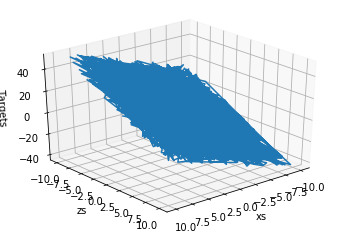

In [7]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape(observations,)

# Plotting according to the conventional matplotlib.pyplot syntax

# Declare the figure
fig = plt.figure()

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Choose the axes.
ax.plot(xs, zs, targets )

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# You can fiddle with the azim parameter to plot the data from different angles. Just change the value of azim=100
# to azim = 0 ; azim = 200, or whatever. Check and see what happens.
ax.view_init(azim = 50)
plt.show

# We reshape the targets back to the shape that they were in before plotting.
# This reshaping is a side-effect of the 3D plot. Sorry for that.
targets = targets.reshape(observations,1)

### initialize variables 

In [8]:
# we start form small weights and biases ranging from -0.1 to 0.1, which will be picked randomly
init_range = 0.1

# randomly generate weights and biases
weights = np.random.uniform(-init_range, init_range, size=(2,1)) # size = (2,1) as we have two dependent variables (inputs) we have two weights 
biases = np.random.uniform(-init_range, init_range, size= 1) # size = 1, as we have one dependent variable (output) we have one bias 

print(weights)
print(biases)

[[ 0.05274666]
 [-0.0520035 ]]
[0.09628626]


### Intialaize learning rate (eta)

In [9]:
learning_rate = 0.01  # we selected this number arbitarily - in future we see how to choose a good learning rate

### Train the model

In [10]:
# use a loop with 100 iterations 
# in each iteration calcualte the output and compare it to the target through the loss function
# print the loss
# adjust weights and biases

for i in range (100):
    outputs = np.dot(inputs,weights) + biases
    # 1000*1         1000*2 2*1        scalar
    deltas = outputs - targets 
    # 1000*1
    # calculate the loss function
    loss_total = np.sum(deltas ** 2) / 2
    # clculate the mean loss (average loss per obseravation) : it make the model independent of the number of observations
    # instead of adjusting the learning rate we adjust the loss
    loss = loss_total / observations
    
    # we print the loss at each step as we want to keep an eye on thether it is decreasing? 
    print(loss)
    
    # rescale the delta to make it independent from the number of observations (to make the algorithm more universal)
    deltas_scaled = deltas / observations
    
    # update weights
    # weights = weights - learning_rate * np.dot(inputs, deltas_scaled)
    # 2*1       2*1           scaler             1000*2  1000*1 => we get error, so we need to transpose inputs

    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled)
    # 2*1       2*1           scaler             2*1000  1000*1
    # always check for compatibility and to avoid demensionality errors
    
    # update biases
    biases = biases - learning_rate * np.sum(deltas_scaled)

202.66004604510542
101.1642500604634
53.589357544579016
31.201522727149946
20.59369412270019
15.50264424306753
12.999071837919333
11.71143629868912
10.996880313164107
10.55377446408892
10.240442521272108
9.990259898066958
9.77184922568726
9.570401091819297
9.37890046645588
9.194002319917983
9.014091250947477
8.838367930982354
8.666418684297252
8.49801255846327
8.333005584568246
8.171295575825665
8.01280076857696
7.857449717730098
7.705176507551616
7.555918474178884
7.40961511568027
7.266207563950909
7.125638322643584
6.987851131238103
6.8527908890586735
6.720403607908712
6.590636378486009
6.463437343547418
6.338755674488273
6.216541549752256
6.096746134316511
5.979321559890162
5.864220905650363
5.751398179428819
5.6408082993033615
5.532407075569468
5.4261511930759285
5.3219981939136
5.219906460448462
5.119835198691224
5.021744421996424
4.925594935084364
4.831348318379281
4.738966912657569
4.648413803999814
4.5596528090406725
4.472648460510639
4.387365993063986
4.303771329387159
4.22183

### Prints the weights and biases obtained at the end of the algorithm to see if we have worked correctly

In [11]:
weights # weights are close to what we expected i.e w1 = 2 and w2 = -3

array([[ 1.99283423],
       [-2.97990135]])

In [12]:
biases

array([3.17973002])

In [13]:
# by increasing the number of iterations, or observations, or initial range for weights
# or decreasing the learning rate we rgcan gete much more accurate results at the cost of longer calculations

### Plot last outputs against the target
Since they are the last outputs at the end of training, they represent the final model accuracy, the closer this plot is to a 45-degree line, the closer target and output values are.

<function matplotlib.pyplot.show(*args, **kw)>

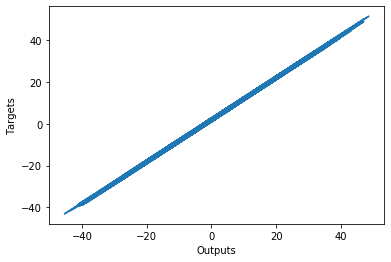

In [14]:
plt.plot(outputs, targets)
plt.xlabel('Outputs')
plt.ylabel('Targets')
plt.show
